In [337]:
import pandas as pd

df = pd.read_csv('data.csv', thousands=',')
df.dropna(how='all', axis=1, inplace=True)
df

,Public Food Key,Classification,Food Name,"Energy with dietary fibre, equated \n(kJ)","Energy, without dietary fibre, equated \n(kJ)",Moisture (water) \n(g),Protein \n(g),Nitrogen \n(g),"Fat, total \n(g)",Ash \n(g),...,Leucine \n(mg),Lysine \n(mg),Methionine \n(mg),Phenylalanine \n(mg),Proline \n(mg),Serine \n(mg),Threonine \n(mg),Tyrosine \n(mg),Tryptophan \n(mg),Valine \n(mg)
0,F002258,31302.0,"Cardamom seed, dried, ground",1236,1012,8.3,10.8,1.72,6.7,5.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,155,NaN
1,F002893,31302.0,"Chilli (chili), dried, ground",1280,1002,10.8,13.4,2.14,14.3,11.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69,NaN
2,F002963,31302.0,"Cinnamon, dried, ground",1004,579,10.6,4.0,0.64,1.2,3.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49,NaN
3,F002970,31302.0,"Cloves, dried, ground",1389,1118,9.9,6.0,0.96,13.0,5.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30,NaN
4,F003190,31302.0,"Coriander seed, dried, ground",1344,1009,8.9,12.4,1.98,17.8,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,178,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1611,F009774,24702.0,"Zucchini, green skin, fresh, unpeeled, fried, ...",92,80,92.6,1.3,0.20,0.4,0.6,...,62.0,58.0,16.0,38.0,32.0,81.0,39.0,28.0,14,53.0
1612,F009773,24702.0,"Zucchini, green skin, fresh, unpeeled, boiled,...",77,66,93.8,1.1,0.17,0.4,0.5,...,52.0,48.0,13.0,31.0,26.0,67.0,33.0,24.0,12,44.0
1613,F009766,24702.0,"Zucchini, golden, fresh, unpeeled, raw",78,70,94.1,2.2,0.35,0.3,0.6,...,106.0,100.0,27.0,64.0,54.0,138.0,67.0,48.0,25,91.0
1614,F009765,24702.0,"Zucchini, golden, fresh, unpeeled, fried, no a...",111,100,91.6,3.1,0.50,0.4,0.8,...,152.0,142.0,38.0,92.0,77.0,198.0,96.0,69.0,35,130.0


### Train test Split

In [338]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.2)
train

,Public Food Key,Classification,Food Name,"Energy with dietary fibre, equated \n(kJ)","Energy, without dietary fibre, equated \n(kJ)",Moisture (water) \n(g),Protein \n(g),Nitrogen \n(g),"Fat, total \n(g)",Ash \n(g),...,Leucine \n(mg),Lysine \n(mg),Methionine \n(mg),Phenylalanine \n(mg),Proline \n(mg),Serine \n(mg),Threonine \n(mg),Tyrosine \n(mg),Tryptophan \n(mg),Valine \n(mg)
732,F000524,18101.0,"Beef, casserole meat, boneless, chuck, semi-tr...",1062,1062,55.3,31.6,5.05,14.2,1.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,256,NaN
600,F005199,16302.0,"Lime, peeled, raw",122,89,87.6,0.8,0.13,0.2,0.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN
1185,F006099,22204.0,"Nut, macadamia, raw, unsalted",3018,2966,1.6,9.2,1.74,74.0,1.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,125,NaN
846,F004845,18102.0,"Lamb, boneless, fillet or loin, untrimmed, gri...",699,699,62.7,26.9,4.31,6.5,1.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,236,NaN
884,F004884,18102.0,"Lamb, chop, with bone, forequarter, lean, gril...",898,898,61.0,28.0,4.48,11.4,1.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,246,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1433,F002247,24705.0,"Capsicum, red, fresh, raw",115,106,93.0,1.1,0.17,0.4,0.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,NaN
996,F006960,18103.0,"Pork, leg steak (round, rump, topside, silvers...",486,486,74.2,23.3,3.73,2.4,1.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,272,NaN
1001,F007017,18103.0,"Pork, loin chop, lean, BBQ'd, no added fat",687,687,63.2,30.6,4.90,4.5,1.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,357,NaN
776,F000831,18101.0,"Beef, steak, boneless rump or sirloin, semi-tr...",775,775,60.2,30.4,4.86,7.0,1.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,246,NaN


### Column Filtering
Many columns have a significant percentage of missing values, remove such columns since they might not be able to provide good insights

In [339]:
null_percentage = df.isnull().sum() / df.shape[0] * 100

# Below code gives list of columns having more than 10% null
col_to_drop = null_percentage[null_percentage > 10].keys()

column_filtered_df = df.drop(col_to_drop, axis=1)
print("Columns to Remove: ", col_to_drop)
column_filtered_df

Columns to Remove:  Index(['Fructose \n(g)', 'Glucose \n(g)', 'Sucrose\n(g)', 'Maltose \n(g)',
       'Lactose \n(g)', 'Galactose \n(g)', 'Maltotrios \n(g)', 'Dextrin \n(g)',
       'Glycerol \n(g)', 'Glycogen \n(g)',
       ...
       'Isoleucine \n(mg)', 'Leucine \n(mg)', 'Lysine \n(mg)',
       'Methionine \n(mg)', 'Phenylalanine \n(mg)', 'Proline \n(mg)',
       'Serine \n(mg)', 'Threonine \n(mg)', 'Tyrosine \n(mg)',
       'Valine \n(mg)'],
      dtype='object', length=206)


,Public Food Key,Classification,Food Name,"Energy with dietary fibre, equated \n(kJ)","Energy, without dietary fibre, equated \n(kJ)",Moisture (water) \n(g),Protein \n(g),Nitrogen \n(g),"Fat, total \n(g)",Ash \n(g),...,C18:3w3 (g),C20:5w3 (mg),C22:5w3 (mg),C22:6w3 (mg),"Total polyunsaturated fatty acids, equated \n(g)","Total long chain omega 3 fatty acids, equated \n(mg)","Total trans fatty acids, imputed \n(mg)",Caffeine \n(mg),Cholesterol \n(mg),Tryptophan \n(mg)
0,F002258,31302.0,"Cardamom seed, dried, ground",1236,1012,8.3,10.8,1.72,6.7,5.8,...,0.39,0.00,0.00,0.0,1.39,0.000,0.0,0,0,155
1,F002893,31302.0,"Chilli (chili), dried, ground",1280,1002,10.8,13.4,2.14,14.3,11.8,...,0.44,0.00,0.00,0.0,6.69,0.000,0.0,0,0,69
2,F002963,31302.0,"Cinnamon, dried, ground",1004,579,10.6,4.0,0.64,1.2,3.6,...,0.02,0.00,0.00,0.0,0.12,0.000,0.0,0,0,49
3,F002970,31302.0,"Cloves, dried, ground",1389,1118,9.9,6.0,0.96,13.0,5.6,...,0.81,11.06,255.52,0.0,5.03,266.581,0.0,0,0,30
4,F003190,31302.0,"Coriander seed, dried, ground",1344,1009,8.9,12.4,1.98,17.8,6.0,...,0.00,0.00,0.00,0.0,1.82,0.000,0.0,0,0,178
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1611,F009774,24702.0,"Zucchini, green skin, fresh, unpeeled, fried, ...",92,80,92.6,1.3,0.20,0.4,0.6,...,0.00,0.00,0.00,0.0,0.00,0.000,0.0,0,0,14
1612,F009773,24702.0,"Zucchini, green skin, fresh, unpeeled, boiled,...",77,66,93.8,1.1,0.17,0.4,0.5,...,0.00,0.00,0.00,0.0,0.00,0.000,0.0,0,0,12
1613,F009766,24702.0,"Zucchini, golden, fresh, unpeeled, raw",78,70,94.1,2.2,0.35,0.3,0.6,...,0.00,0.00,0.00,0.0,0.00,0.000,0.0,0,0,25
1614,F009765,24702.0,"Zucchini, golden, fresh, unpeeled, fried, no a...",111,100,91.6,3.1,0.50,0.4,0.8,...,0.00,0.00,0.00,0.0,0.00,0.000,0.0,0,0,35


Drop Columns that have more than 50% Zeroes since they don't provide much utility

In [340]:
df_zero_filtered = column_filtered_df.loc[:, (column_filtered_df == 0).mean() < .5]
df_zero_filtered

,Public Food Key,Classification,Food Name,"Energy with dietary fibre, equated \n(kJ)","Energy, without dietary fibre, equated \n(kJ)",Moisture (water) \n(g),Protein \n(g),Nitrogen \n(g),"Fat, total \n(g)",Ash \n(g),...,Dietary folate equivalents \n(ug),Alpha tocopherol \n(mg),Vitamin E \n(mg),"Total saturated fatty acids, equated \n(g)","Total monounsaturated fatty acids, equated \n(g)",C18:2w6 (g),C18:3w3 (g),"Total polyunsaturated fatty acids, equated \n(g)","Total trans fatty acids, imputed \n(mg)",Tryptophan \n(mg)
0,F002258,31302.0,"Cardamom seed, dried, ground",1236,1012,8.3,10.8,1.72,6.7,5.8,...,3,2.8,2.85,2.20,2.81,1.00,0.39,1.39,0.0,155
1,F002893,31302.0,"Chilli (chili), dried, ground",1280,1002,10.8,13.4,2.14,14.3,11.8,...,28,38.1,38.14,2.06,2.68,6.24,0.44,6.69,0.0,69
2,F002963,31302.0,"Cinnamon, dried, ground",1004,579,10.6,4.0,0.64,1.2,3.6,...,6,2.3,2.32,0.62,0.44,0.08,0.02,0.12,0.0,49
3,F002970,31302.0,"Cloves, dried, ground",1389,1118,9.9,6.0,0.96,13.0,5.6,...,25,8.8,8.82,5.49,1.93,3.69,0.81,5.03,0.0,30
4,F003190,31302.0,"Coriander seed, dried, ground",1344,1009,8.9,12.4,1.98,17.8,6.0,...,0,0.9,0.91,1.03,14.14,1.82,0.00,1.82,0.0,178
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1611,F009774,24702.0,"Zucchini, green skin, fresh, unpeeled, fried, ...",92,80,92.6,1.3,0.20,0.4,0.6,...,19,0.7,0.70,0.00,0.00,0.00,0.00,0.00,0.0,14
1612,F009773,24702.0,"Zucchini, green skin, fresh, unpeeled, boiled,...",77,66,93.8,1.1,0.17,0.4,0.5,...,13,0.6,0.59,0.00,0.00,0.00,0.00,0.00,0.0,12
1613,F009766,24702.0,"Zucchini, golden, fresh, unpeeled, raw",78,70,94.1,2.2,0.35,0.3,0.6,...,17,0.5,0.52,0.00,0.00,0.00,0.00,0.00,0.0,25
1614,F009765,24702.0,"Zucchini, golden, fresh, unpeeled, fried, no a...",111,100,91.6,3.1,0.50,0.4,0.8,...,17,0.7,0.70,0.00,0.00,0.00,0.00,0.00,0.0,35


In [341]:
df_zero_filtered.describe()

,Classification,"Energy with dietary fibre, equated \n(kJ)","Energy, without dietary fibre, equated \n(kJ)",Moisture (water) \n(g),Protein \n(g),Nitrogen \n(g),"Fat, total \n(g)",Ash \n(g),Total dietary fibre \n(g),Total sugars (g),...,Dietary folate equivalents \n(ug),Alpha tocopherol \n(mg),Vitamin E \n(mg),"Total saturated fatty acids, equated \n(g)","Total monounsaturated fatty acids, equated \n(g)",C18:2w6 (g),C18:3w3 (g),"Total polyunsaturated fatty acids, equated \n(g)","Total trans fatty acids, imputed \n(mg)",Tryptophan \n(mg)
count,1614.000000,1616.000000,1616.000000,1616.000000,1616.000000,1616.000000,1616.000000,1616.000000,1616.000000,1616.000000,...,1616.000000,1616.000000,1616.000000,1616.000000,1616.000000,1616.000000,1616.000000,1616.000000,1616.00000,1616.000000
mean,18760.882900,845.643564,823.602723,57.143193,12.439233,2.012735,9.495730,1.874876,2.676980,5.890780,...,51.781559,1.160149,1.354121,3.309425,3.727692,1.323156,0.214889,1.669988,175.53367,124.447401
std,5062.646828,702.908930,696.848908,29.319870,11.278716,1.821698,16.903693,5.122109,5.970007,13.361203,...,174.729168,3.503735,6.355711,6.577457,7.750950,4.534164,1.604467,5.217645,479.74001,112.338987
min,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,15101.000000,306.750000,294.750000,34.700000,2.175000,0.340000,0.400000,0.700000,0.000000,0.000000,...,3.000000,0.100000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,21.000000
50%,18102.000000,662.500000,658.500000,65.200000,9.350000,1.550000,3.000000,1.200000,0.500000,0.900000,...,17.000000,0.400000,0.400000,0.840000,0.930000,0.240000,0.040000,0.470000,14.88000,97.000000
75%,23107.000000,1214.500000,1154.000000,79.600000,21.900000,3.510000,10.200000,1.800000,3.000000,4.700000,...,39.250000,0.800000,0.870000,3.542500,3.840000,0.922500,0.120000,1.212500,156.41250,211.250000
max,34101.000000,3703.000000,3703.000000,100.000000,85.000000,15.200000,100.000000,99.800000,88.700000,100.000000,...,4031.000000,56.000000,211.000000,92.410000,80.590000,63.760000,54.580000,68.880000,5890.90000,795.000000


In [342]:
df_numeric_only = df_zero_filtered.drop(['Classification', 'Public Food Key', 'Food Name'], axis=1)
df_numeric_only

,"Energy with dietary fibre, equated \n(kJ)","Energy, without dietary fibre, equated \n(kJ)",Moisture (water) \n(g),Protein \n(g),Nitrogen \n(g),"Fat, total \n(g)",Ash \n(g),Total dietary fibre \n(g),Total sugars (g),"Available carbohydrate, without sugar alcohols \n(g)",...,Dietary folate equivalents \n(ug),Alpha tocopherol \n(mg),Vitamin E \n(mg),"Total saturated fatty acids, equated \n(g)","Total monounsaturated fatty acids, equated \n(g)",C18:2w6 (g),C18:3w3 (g),"Total polyunsaturated fatty acids, equated \n(g)","Total trans fatty acids, imputed \n(mg)",Tryptophan \n(mg)
0,1236,1012,8.3,10.8,1.72,6.7,5.8,28.0,4.4,34.4,...,3,2.8,2.85,2.20,2.81,1.00,0.39,1.39,0.0,155
1,1280,1002,10.8,13.4,2.14,14.3,11.8,34.8,7.2,14.9,...,28,38.1,38.14,2.06,2.68,6.24,0.44,6.69,0.0,69
2,1004,579,10.6,4.0,0.64,1.2,3.6,53.1,2.2,27.5,...,6,2.3,2.32,0.62,0.44,0.08,0.02,0.12,0.0,49
3,1389,1118,9.9,6.0,0.96,13.0,5.6,33.9,2.4,31.6,...,25,8.8,8.82,5.49,1.93,3.69,0.81,5.03,0.0,30
4,1344,1009,8.9,12.4,1.98,17.8,6.0,41.9,2.4,8.4,...,0,0.9,0.91,1.03,14.14,1.82,0.00,1.82,0.0,178
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1611,92,80,92.6,1.3,0.20,0.4,0.6,1.6,2.4,2.4,...,19,0.7,0.70,0.00,0.00,0.00,0.00,0.00,0.0,14
1612,77,66,93.8,1.1,0.17,0.4,0.5,1.3,2.0,2.0,...,13,0.6,0.59,0.00,0.00,0.00,0.00,0.00,0.0,12
1613,78,70,94.1,2.2,0.35,0.3,0.6,1.0,1.1,1.1,...,17,0.5,0.52,0.00,0.00,0.00,0.00,0.00,0.0,25
1614,111,100,91.6,3.1,0.50,0.4,0.8,1.4,1.6,1.6,...,17,0.7,0.70,0.00,0.00,0.00,0.00,0.00,0.0,35


We can see that the data has significant outliers, that will bias the outcomes of the model. Removing the rows with outlier values.

In [343]:
import pandas as pd
import numpy as np
from scipy import stats

df_outlier_filtered = df_numeric_only[(np.abs(stats.zscore(df_numeric_only)) < 3).all(axis=1)]
df_outlier_filtered.describe()

,"Energy with dietary fibre, equated \n(kJ)","Energy, without dietary fibre, equated \n(kJ)",Moisture (water) \n(g),Protein \n(g),Nitrogen \n(g),"Fat, total \n(g)",Ash \n(g),Total dietary fibre \n(g),Total sugars (g),"Available carbohydrate, without sugar alcohols \n(g)",...,Dietary folate equivalents \n(ug),Alpha tocopherol \n(mg),Vitamin E \n(mg),"Total saturated fatty acids, equated \n(g)","Total monounsaturated fatty acids, equated \n(g)",C18:2w6 (g),C18:3w3 (g),"Total polyunsaturated fatty acids, equated \n(g)","Total trans fatty acids, imputed \n(mg)",Tryptophan \n(mg)
count,1333.000000,1333.000000,1333.00000,1333.000000,1333.000000,1333.000000,1333.000000,1333.000000,1333.000000,1333.000000,...,1333.000000,1333.000000,1333.000000,1333.000000,1333.000000,1333.000000,1333.000000,1333.000000,1333.000000,1333.000000
mean,690.436609,675.657914,63.71883,12.600975,2.028432,6.117104,1.311478,1.773893,4.128282,13.519805,...,36.486872,0.663316,0.684966,2.270608,2.408230,0.625274,0.086677,0.852138,120.239895,124.206302
std,507.280595,502.482314,24.83551,10.892554,1.739994,8.658042,1.252677,2.750410,7.987821,20.444727,...,63.840860,1.167392,1.206849,3.615873,3.953022,1.101220,0.184816,1.329476,224.258089,107.504181
min,0.000000,0.000000,1.20000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,272.000000,255.000000,55.10000,2.200000,0.370000,0.300000,0.700000,0.000000,0.000000,0.000000,...,3.000000,0.100000,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.000000
50%,585.000000,581.000000,69.60000,9.700000,1.610000,2.700000,1.100000,0.400000,0.700000,2.700000,...,17.000000,0.300000,0.350000,0.720000,0.860000,0.200000,0.040000,0.400000,16.720000,100.000000
75%,961.000000,957.000000,81.90000,22.200000,3.570000,8.600000,1.500000,2.700000,4.000000,17.100000,...,37.000000,0.700000,0.750000,2.990000,3.270000,0.730000,0.100000,1.000000,142.300000,211.000000
max,2334.000000,2307.000000,100.00000,43.600000,6.990000,55.500000,16.200000,17.700000,45.500000,81.500000,...,449.000000,10.600000,10.600000,22.160000,26.860000,11.090000,4.060000,12.260000,1600.300000,420.000000


Impute

In [344]:
df_imputed = df_outlier_filtered.fillna(df_outlier_filtered.mean())
df_imputed.describe()

,"Energy with dietary fibre, equated \n(kJ)","Energy, without dietary fibre, equated \n(kJ)",Moisture (water) \n(g),Protein \n(g),Nitrogen \n(g),"Fat, total \n(g)",Ash \n(g),Total dietary fibre \n(g),Total sugars (g),"Available carbohydrate, without sugar alcohols \n(g)",...,Dietary folate equivalents \n(ug),Alpha tocopherol \n(mg),Vitamin E \n(mg),"Total saturated fatty acids, equated \n(g)","Total monounsaturated fatty acids, equated \n(g)",C18:2w6 (g),C18:3w3 (g),"Total polyunsaturated fatty acids, equated \n(g)","Total trans fatty acids, imputed \n(mg)",Tryptophan \n(mg)
count,1333.000000,1333.000000,1333.00000,1333.000000,1333.000000,1333.000000,1333.000000,1333.000000,1333.000000,1333.000000,...,1333.000000,1333.000000,1333.000000,1333.000000,1333.000000,1333.000000,1333.000000,1333.000000,1333.000000,1333.000000
mean,690.436609,675.657914,63.71883,12.600975,2.028432,6.117104,1.311478,1.773893,4.128282,13.519805,...,36.486872,0.663316,0.684966,2.270608,2.408230,0.625274,0.086677,0.852138,120.239895,124.206302
std,507.280595,502.482314,24.83551,10.892554,1.739994,8.658042,1.252677,2.750410,7.987821,20.444727,...,63.840860,1.167392,1.206849,3.615873,3.953022,1.101220,0.184816,1.329476,224.258089,107.504181
min,0.000000,0.000000,1.20000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,272.000000,255.000000,55.10000,2.200000,0.370000,0.300000,0.700000,0.000000,0.000000,0.000000,...,3.000000,0.100000,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.000000
50%,585.000000,581.000000,69.60000,9.700000,1.610000,2.700000,1.100000,0.400000,0.700000,2.700000,...,17.000000,0.300000,0.350000,0.720000,0.860000,0.200000,0.040000,0.400000,16.720000,100.000000
75%,961.000000,957.000000,81.90000,22.200000,3.570000,8.600000,1.500000,2.700000,4.000000,17.100000,...,37.000000,0.700000,0.750000,2.990000,3.270000,0.730000,0.100000,1.000000,142.300000,211.000000
max,2334.000000,2307.000000,100.00000,43.600000,6.990000,55.500000,16.200000,17.700000,45.500000,81.500000,...,449.000000,10.600000,10.600000,22.160000,26.860000,11.090000,4.060000,12.260000,1600.300000,420.000000


Normalise

In [345]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

x = scaler.fit_transform(df_imputed.to_numpy())
df_normalised = pd.DataFrame(x, columns=df_imputed.columns)
df_normalised.describe()

,"Energy with dietary fibre, equated \n(kJ)","Energy, without dietary fibre, equated \n(kJ)",Moisture (water) \n(g),Protein \n(g),Nitrogen \n(g),"Fat, total \n(g)",Ash \n(g),Total dietary fibre \n(g),Total sugars (g),"Available carbohydrate, without sugar alcohols \n(g)",...,Dietary folate equivalents \n(ug),Alpha tocopherol \n(mg),Vitamin E \n(mg),"Total saturated fatty acids, equated \n(g)","Total monounsaturated fatty acids, equated \n(g)",C18:2w6 (g),C18:3w3 (g),"Total polyunsaturated fatty acids, equated \n(g)","Total trans fatty acids, imputed \n(mg)",Tryptophan \n(mg)
count,1333.000000,1333.000000,1333.000000,1333.000000,1333.000000,1333.000000,1333.000000,1333.000000,1333.000000,1333.000000,...,1333.000000,1333.000000,1333.000000,1333.000000,1333.000000,1333.000000,1333.000000,1333.000000,1333.000000,1333.000000
mean,0.295817,0.292873,0.632782,0.289013,0.290191,0.110218,0.080955,0.100220,0.090731,0.165887,...,0.081263,0.062577,0.064619,0.102464,0.089659,0.056382,0.021349,0.069506,0.075136,0.295729
std,0.217344,0.217808,0.251372,0.249829,0.248926,0.156001,0.077326,0.155390,0.175557,0.250856,...,0.142185,0.110131,0.113854,0.163171,0.147171,0.099298,0.045521,0.108440,0.140135,0.255962
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.116538,0.110533,0.545547,0.050459,0.052933,0.005405,0.043210,0.000000,0.000000,0.000000,...,0.006682,0.009434,0.007547,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.054762
50%,0.250643,0.251842,0.692308,0.222477,0.230329,0.048649,0.067901,0.022599,0.015385,0.033129,...,0.037862,0.028302,0.033019,0.032491,0.032018,0.018034,0.009852,0.032626,0.010448,0.238095
75%,0.411740,0.414824,0.816802,0.509174,0.510730,0.154955,0.092593,0.152542,0.087912,0.209816,...,0.082405,0.066038,0.070755,0.134928,0.121742,0.065825,0.024631,0.081566,0.088921,0.502381
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## <span style="color:blue">Insert Columns Here</span>

In [346]:
predict_column = 'Total folates \n(ug)'
hide_columns = ['Folate, natural \n(ug)','Dietary folate equivalents \n(ug)']

In [347]:
y = df_normalised[predict_column]
x = df_normalised[df_normalised.columns.difference([predict_column] + hide_columns)]
x

,Alpha tocopherol \n(mg),Ash \n(g),"Available carbohydrate, with sugar alcohols \n(g)","Available carbohydrate, without sugar alcohols \n(g)",Beta-carotene equivalents (provitamin A) \n(ug),C18:2w6 (g),C18:3w3 (g),Calcium (Ca) \n(mg),"Energy with dietary fibre, equated \n(kJ)","Energy, without dietary fibre, equated \n(kJ)",...,Total dietary fibre \n(g),"Total monounsaturated fatty acids, equated \n(g)","Total polyunsaturated fatty acids, equated \n(g)","Total saturated fatty acids, equated \n(g)",Total sugars (g),"Total trans fatty acids, imputed \n(mg)",Tryptophan \n(mg),Vitamin A retinol equivalents \n(ug),Vitamin E \n(mg),Zinc (Zn) \n(mg)
0,0.018868,0.191358,0.914110,0.914110,0.000000,0.005410,0.014778,0.028571,0.570694,0.557000,...,0.333333,0.003351,0.009788,0.008123,0.000000,0.0,0.000000,0.000000,0.023585,0.012453
1,0.000000,0.000000,0.176687,0.176687,0.000000,0.000000,0.000000,0.006122,0.098972,0.100130,...,0.000000,0.000000,0.000000,0.000000,0.316484,0.0,0.000000,0.000000,0.000000,0.001245
2,0.000000,0.018519,0.154601,0.154601,0.000000,0.000902,0.000000,0.022449,0.515424,0.521456,...,0.000000,0.000745,0.000816,0.000903,0.276923,0.0,0.000000,0.000000,0.000000,0.013699
3,0.000000,0.000000,0.025767,0.025767,0.000000,0.000000,0.000000,0.008163,0.074550,0.075423,...,0.000000,0.000000,0.000000,0.000000,0.004396,0.0,0.007143,0.000000,0.000000,0.000000
4,0.000000,0.006173,0.028221,0.028221,0.000000,0.000000,0.000000,0.008163,0.065124,0.065886,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.007143,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1328,0.066038,0.037037,0.029448,0.029448,0.102000,0.000000,0.000000,0.051020,0.039417,0.034677,...,0.090395,0.000000,0.000000,0.000000,0.052747,0.0,0.033333,0.057526,0.066038,0.058531
1329,0.056604,0.030864,0.024540,0.024540,0.085143,0.000000,0.000000,0.040816,0.032991,0.028609,...,0.073446,0.000000,0.000000,0.000000,0.043956,0.0,0.028571,0.047939,0.055660,0.046077
1330,0.047170,0.037037,0.013497,0.013497,0.032000,0.000000,0.000000,0.032653,0.033419,0.030342,...,0.056497,0.000000,0.000000,0.000000,0.024176,0.0,0.059524,0.017258,0.049057,0.087173
1331,0.066038,0.049383,0.019632,0.019632,0.038571,0.000000,0.000000,0.046939,0.047558,0.043346,...,0.079096,0.000000,0.000000,0.000000,0.035165,0.0,0.083333,0.021093,0.066038,0.124533


In [348]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

# Fit to the train dataset
lm.fit(x, y)

LinearRegression()

In [349]:
from sklearn.metrics import mean_squared_error

y_pred = lm.predict(x)
mse = mean_squared_error(y, y_pred)

print('MSE for the train dataset', mse)

MSE for the train dataset 0.013537091670619892


Preparing Test Dataset

In [350]:
test_column_filtered = test[df_normalised.columns]
test_column_filtered

,"Energy with dietary fibre, equated \n(kJ)","Energy, without dietary fibre, equated \n(kJ)",Moisture (water) \n(g),Protein \n(g),Nitrogen \n(g),"Fat, total \n(g)",Ash \n(g),Total dietary fibre \n(g),Total sugars (g),"Available carbohydrate, without sugar alcohols \n(g)",...,Dietary folate equivalents \n(ug),Alpha tocopherol \n(mg),Vitamin E \n(mg),"Total saturated fatty acids, equated \n(g)","Total monounsaturated fatty acids, equated \n(g)",C18:2w6 (g),C18:3w3 (g),"Total polyunsaturated fatty acids, equated \n(g)","Total trans fatty acids, imputed \n(mg)",Tryptophan \n(mg)
478,115,110,94.5,0.5,0.10,1.4,0.3,0.6,2.2,3.0,...,0,0.5,0.50,0.12,0.80,0.39,0.00,0.39,21.41,5
284,1465,1389,12.2,8.2,1.37,3.6,1.3,8.6,1.2,65.8,...,20,0.4,0.40,0.36,0.86,1.24,0.05,1.30,0.00,103
118,2058,2026,2.5,8.1,1.36,20.7,2.3,3.4,6.7,66.3,...,29,4.0,4.13,9.08,7.97,2.45,0.10,2.59,157.60,68
1309,1050,1040,51.5,13.8,2.20,13.2,1.6,1.2,1.7,18.9,...,74,0.4,0.51,1.78,6.99,1.89,0.96,3.65,71.83,114
1490,151,124,89.7,2.3,0.37,0.4,0.9,3.4,4.1,4.1,...,25,0.3,0.33,0.00,0.00,0.00,0.00,0.00,0.00,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,1362,1269,10.3,11.2,1.97,2.4,1.5,11.4,1.3,58.3,...,47,0.9,0.93,0.36,0.36,1.01,0.06,1.08,0.00,122
1097,506,506,75.1,17.8,2.85,5.5,0.9,0.0,0.0,0.0,...,0,0.4,0.45,1.71,2.72,0.63,0.03,0.76,31.19,225
443,788,788,61.4,3.7,0.58,10.6,0.7,0.0,18.4,20.5,...,10,0.0,0.00,7.16,2.50,0.19,0.09,0.28,310.53,71
466,430,430,78.6,3.6,0.57,3.7,0.8,0.0,9.6,13.9,...,4,0.1,0.10,2.51,0.84,0.07,0.02,0.10,109.16,36


In [351]:
test_null_removed = test_column_filtered.dropna()
test_null_removed

,"Energy with dietary fibre, equated \n(kJ)","Energy, without dietary fibre, equated \n(kJ)",Moisture (water) \n(g),Protein \n(g),Nitrogen \n(g),"Fat, total \n(g)",Ash \n(g),Total dietary fibre \n(g),Total sugars (g),"Available carbohydrate, without sugar alcohols \n(g)",...,Dietary folate equivalents \n(ug),Alpha tocopherol \n(mg),Vitamin E \n(mg),"Total saturated fatty acids, equated \n(g)","Total monounsaturated fatty acids, equated \n(g)",C18:2w6 (g),C18:3w3 (g),"Total polyunsaturated fatty acids, equated \n(g)","Total trans fatty acids, imputed \n(mg)",Tryptophan \n(mg)
478,115,110,94.5,0.5,0.10,1.4,0.3,0.6,2.2,3.0,...,0,0.5,0.50,0.12,0.80,0.39,0.00,0.39,21.41,5
284,1465,1389,12.2,8.2,1.37,3.6,1.3,8.6,1.2,65.8,...,20,0.4,0.40,0.36,0.86,1.24,0.05,1.30,0.00,103
118,2058,2026,2.5,8.1,1.36,20.7,2.3,3.4,6.7,66.3,...,29,4.0,4.13,9.08,7.97,2.45,0.10,2.59,157.60,68
1309,1050,1040,51.5,13.8,2.20,13.2,1.6,1.2,1.7,18.9,...,74,0.4,0.51,1.78,6.99,1.89,0.96,3.65,71.83,114
1490,151,124,89.7,2.3,0.37,0.4,0.9,3.4,4.1,4.1,...,25,0.3,0.33,0.00,0.00,0.00,0.00,0.00,0.00,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,1362,1269,10.3,11.2,1.97,2.4,1.5,11.4,1.3,58.3,...,47,0.9,0.93,0.36,0.36,1.01,0.06,1.08,0.00,122
1097,506,506,75.1,17.8,2.85,5.5,0.9,0.0,0.0,0.0,...,0,0.4,0.45,1.71,2.72,0.63,0.03,0.76,31.19,225
443,788,788,61.4,3.7,0.58,10.6,0.7,0.0,18.4,20.5,...,10,0.0,0.00,7.16,2.50,0.19,0.09,0.28,310.53,71
466,430,430,78.6,3.6,0.57,3.7,0.8,0.0,9.6,13.9,...,4,0.1,0.10,2.51,0.84,0.07,0.02,0.10,109.16,36


In [352]:
x = scaler.fit_transform(test_null_removed.to_numpy())
text_normalised = pd.DataFrame(x, columns=test_null_removed.columns)
text_normalised.describe()

,"Energy with dietary fibre, equated \n(kJ)","Energy, without dietary fibre, equated \n(kJ)",Moisture (water) \n(g),Protein \n(g),Nitrogen \n(g),"Fat, total \n(g)",Ash \n(g),Total dietary fibre \n(g),Total sugars (g),"Available carbohydrate, without sugar alcohols \n(g)",...,Dietary folate equivalents \n(ug),Alpha tocopherol \n(mg),Vitamin E \n(mg),"Total saturated fatty acids, equated \n(g)","Total monounsaturated fatty acids, equated \n(g)",C18:2w6 (g),C18:3w3 (g),"Total polyunsaturated fatty acids, equated \n(g)","Total trans fatty acids, imputed \n(mg)",Tryptophan \n(mg)
count,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,...,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000
mean,0.229437,0.223245,0.571800,0.262544,0.265668,0.093812,0.019669,0.057981,0.064467,0.162576,...,0.018620,0.030402,0.032259,0.052323,0.100156,0.022934,0.012784,0.027082,0.029888,0.279314
std,0.185902,0.183463,0.305573,0.235901,0.237148,0.157056,0.060671,0.123909,0.146391,0.240365,...,0.075104,0.092894,0.096752,0.103767,0.178578,0.081984,0.064816,0.085259,0.085441,0.252752
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.074574,0.071400,0.332661,0.038009,0.039491,0.004000,0.006012,0.000000,0.000000,0.000000,...,0.000496,0.001969,0.001573,0.000114,0.000211,0.000000,0.000000,0.000000,0.000000,0.035000
50%,0.190894,0.188868,0.641633,0.215203,0.224900,0.031000,0.012024,0.010504,0.009298,0.035124,...,0.003969,0.007874,0.009177,0.013168,0.025648,0.004918,0.002592,0.007908,0.002497,0.231111
75%,0.328290,0.310997,0.823337,0.462527,0.469210,0.108000,0.018036,0.063025,0.041581,0.219267,...,0.009489,0.020997,0.023335,0.060892,0.112176,0.018252,0.007777,0.022649,0.026243,0.485000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [353]:
y_test = text_normalised[predict_column]
x_test = text_normalised[text_normalised.columns.difference([predict_column] + hide_columns)]
x_test

,Alpha tocopherol \n(mg),Ash \n(g),"Available carbohydrate, with sugar alcohols \n(g)","Available carbohydrate, without sugar alcohols \n(g)",Beta-carotene equivalents (provitamin A) \n(ug),C18:2w6 (g),C18:3w3 (g),Calcium (Ca) \n(mg),"Energy with dietary fibre, equated \n(kJ)","Energy, without dietary fibre, equated \n(kJ)",...,Total dietary fibre \n(g),"Total monounsaturated fatty acids, equated \n(g)","Total polyunsaturated fatty acids, equated \n(g)","Total saturated fatty acids, equated \n(g)",Total sugars (g),"Total trans fatty acids, imputed \n(mg)",Tryptophan \n(mg),Vitamin A retinol equivalents \n(ug),Vitamin E \n(mg),Zinc (Zn) \n(mg)
0,0.013123,0.003006,0.030992,0.030992,0.000000,0.007377,0.000000,0.002727,0.031073,0.029722,...,0.012605,0.022548,0.006704,0.001827,0.022727,0.003634,0.011111,0.000000,0.013110,0.002778
1,0.010499,0.013026,0.679752,0.679752,0.000000,0.023454,0.003240,0.009091,0.395839,0.375304,...,0.180672,0.024239,0.022348,0.005480,0.012397,0.000000,0.228889,0.000000,0.010488,0.075000
2,0.104987,0.023046,0.684917,0.684917,0.000000,0.046340,0.006481,0.037273,0.556066,0.547420,...,0.071429,0.224634,0.044525,0.138225,0.069215,0.026753,0.151111,0.000000,0.108285,0.045000
3,0.010499,0.016032,0.195248,0.195248,0.000000,0.035748,0.062216,0.013636,0.283707,0.281005,...,0.025210,0.197012,0.062747,0.027097,0.017562,0.012193,0.253333,0.001249,0.013372,0.025000
4,0.007874,0.009018,0.042355,0.042355,0.018333,0.000000,0.000000,0.031818,0.040800,0.033504,...,0.071429,0.000000,0.000000,0.000000,0.042355,0.000000,0.042222,0.003831,0.008652,0.017778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319,0.023622,0.015030,0.602273,0.602273,0.000000,0.019103,0.003889,0.031818,0.368009,0.342880,...,0.239496,0.010147,0.018566,0.005480,0.013430,0.000000,0.271111,0.000000,0.024384,0.111111
320,0.010499,0.009018,0.000000,0.000000,0.000000,0.011916,0.001944,0.006364,0.136720,0.136720,...,0.000000,0.076663,0.013065,0.026031,0.000000,0.005295,0.500000,0.001499,0.011799,0.111111
321,0.000000,0.007014,0.211777,0.211777,0.012667,0.003594,0.005833,0.084545,0.212915,0.212915,...,0.000000,0.070462,0.004813,0.108997,0.190083,0.052714,0.157778,0.015158,0.000000,0.012778
322,0.002625,0.008016,0.143595,0.143595,0.001267,0.001324,0.001296,0.104545,0.116185,0.116185,...,0.000000,0.023675,0.001719,0.038210,0.099174,0.018530,0.080000,0.003998,0.002622,0.020000


In [354]:
from sklearn.metrics import mean_squared_error

y_pred = lm.predict(x_test)
mse = mean_squared_error(y_test, y_pred)

print('MSE for the test dataset', mse)

MSE for the test dataset 0.022206631631544852


Error is within acceptable bounds, Yay!

Feature: Alpha tocopherol  (mg), Score: -1.390831749505517
Feature: Ash  (g), Score: 0.23511564206096858
Feature: Available carbohydrate, with sugar alcohols  (g), Score: -0.2425215627271918
Feature: Available carbohydrate, without sugar alcohols  (g), Score: 0.6412670256622329
Feature: Beta-carotene equivalents (provitamin A)  (ug), Score: 0.10349356966483754
Feature: C18:2w6 (g), Score: 0.03456610058850033
Feature: C18:3w3 (g), Score: -0.02326462325627644
Feature: Calcium (Ca)  (mg), Score: 0.32131707077852695
Feature: Energy with dietary fibre, equated  (kJ), Score: 19.93166775217747
Feature: Energy, without dietary fibre, equated  (kJ), Score: -19.310575060329736
Feature: Fat, total  (g), Score: 0.5333414329891244
Feature: Iodine (I)  (ug), Score: 0.4462775059396391
Feature: Iron (Fe)  (mg), Score: 0.18785167133021943
Feature: Magnesium (Mg)  (mg), Score: -0.14806409106595605
Feature: Moisture (water)  (g), Score: 0.7391388685150447
Feature: Niacin (B3)  (mg), Score: 0.095444592052

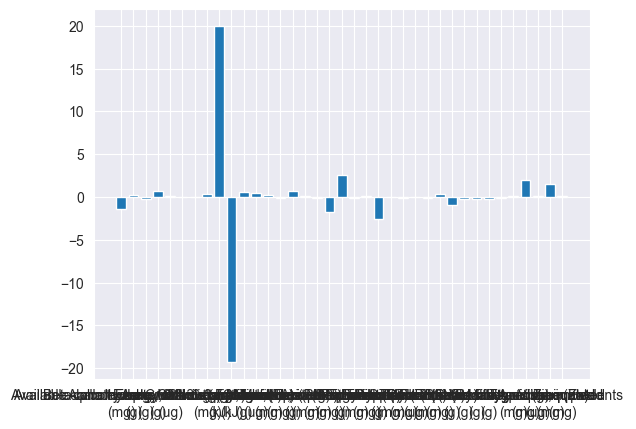

In [355]:
from matplotlib import pyplot as plt

importance = lm.coef_
# summarize feature importance
for i, v in enumerate(importance):
    print(f'Feature: {x_test.columns[i]}, Score: {v}'.replace('\n',' '))
# plot feature importance
plt.bar(x_test.columns, importance)
plt.show()